In [11]:
'''
Date: 2022.09.26
Title: 
By: Kang Jin Seong
'''

# 데이터 셋 가져오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [12]:
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [13]:
# 모델을 만드는 간단한 함수를 정의
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model


model = model_fn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)
# verbose: 훈련과정 출력 조절
# default : 1 에포크마다 진행 막대와 함께 손실등의 지표가 출력
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


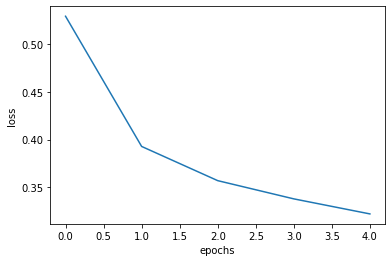

In [15]:
'''손실 곡선 그리기'''

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()


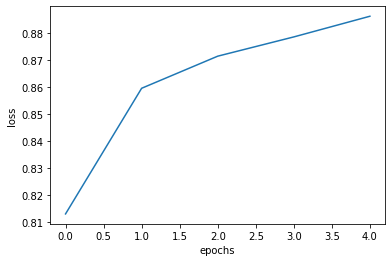

In [16]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

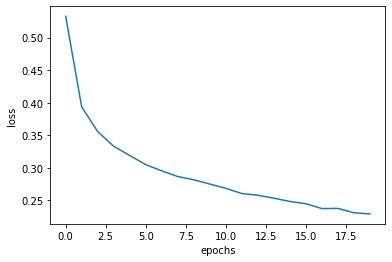

In [17]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [8]:
'''검증 손실 '''
# 인공 신경망 모델이 최적화 하는 대상은 정확도가 아니라 손실 함수
model = model_fn()
model.compile(loss  = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5317 - accuracy: 0.8136 - val_loss: 0.4369 - val_accuracy: 0.8435
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3948 - accuracy: 0.8582 - val_loss: 0.3719 - val_accuracy: 0.8668
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3556 - accuracy: 0.8721 - val_loss: 0.3737 - val_accuracy: 0.8671
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3324 - accuracy: 0.8800 - val_loss: 0.3630 - val_accuracy: 0.8758
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3192 - accuracy: 0.8864 - val_loss: 0.3483 - val_accuracy: 0.8822
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3090 - accuracy: 0.8916 - val_loss: 0.3467 - val_accuracy: 0.8845
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8950 - val_loss: 0.3634 - val_accuracy:

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


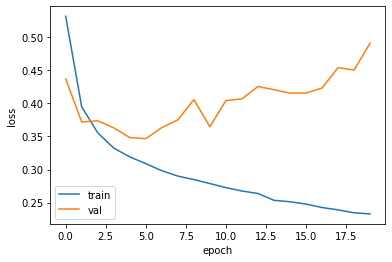

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5249 - accuracy: 0.8188 - val_loss: 0.4317 - val_accuracy: 0.8459
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3931 - accuracy: 0.8599 - val_loss: 0.4338 - val_accuracy: 0.8459
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3508 - accuracy: 0.8731 - val_loss: 0.3654 - val_accuracy: 0.8686
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3292 - accuracy: 0.8803 - val_loss: 0.3563 - val_accuracy: 0.8707
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3066 - accuracy: 0.8871 - val_loss: 0.3278 - val_accuracy: 0.8786
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2905 - accuracy: 0.8936 - val_loss: 0.3593 - val_accuracy: 0.8716
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2780 - accuracy: 0.8984 - val_loss: 0.3334 - val_accuracy:

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


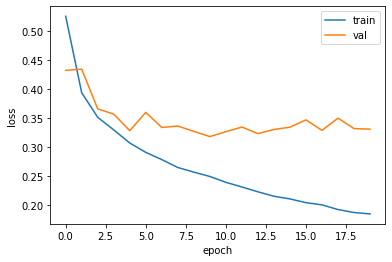

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
'''
드롭아웃: 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막는다.
'''

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5950 - accuracy: 0.7894 - val_loss: 0.4217 - val_accuracy: 0.8487
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4391 - accuracy: 0.8433 - val_loss: 0.3804 - val_accuracy: 0.8620
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4081 - accuracy: 0.8540 - val_loss: 0.3706 - val_accuracy: 0.8639
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3842 - accuracy: 0.8606 - val_loss: 0.3540 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3684 - accuracy: 0.8642 - val_loss: 0.3391 - val_accuracy: 0.8759
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3558 - accuracy: 0.8701 - val_loss: 0.3376 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3443 - accuracy: 0.8732 - val_loss: 0.3344 - val_accuracy:

[]

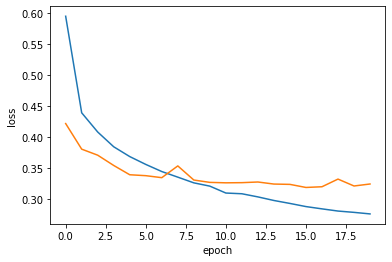

In [29]:
# 평가나 예측을 수행할 때는 드롭 아웃을 적용하지 말아야한다.(훈련된 모든 뉴런을 사용해야 올바른 예측을 수행 할 수 있다.)
# 텐서플로와 케라스는 모델을 평가와 예측에 사용 할 때는 자동으로 드롭아웃을 적용하지 않는다.

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.plot()

In [30]:
'''모델 저장 과 복원'''
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

In [32]:
# 모델 파라미터 저장
model.save_weights('model-weights.h5')
# 모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [33]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Sep 28 05:53 model-weights.h5
-rw-r--r-- 1 root root 982664 Sep 28 05:53 model-whole.h5


In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
# 모델 예측하기
# 여기서는 predict()를 사용 다중 회귀 문제에서는 타겟값의 종류 만큼  확률이 출력됨
# evaluate() 메서드는 모델의 compile이 실행되어야한다.
# 여기에서는 새로운 데이터에 대해 정확도만 계산하면 되는 상황이라고 가정한다.
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1) # axis = -1는 마지막 차원을 따라 진행 2차원: axis = 0, 1
print(np.mean(val_labels == val_target))

0.889


In [38]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 917us/step - loss: 0.3148 - accuracy: 0.8890


[0.31477877497673035, 0.8889999985694885]

In [40]:
'''
콜백: 최상의 검증 점수를 만드는 모델을 저장
'''

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

In [41]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.8882


[0.32372167706489563, 0.8882499933242798]

In [46]:
'''조기 종료'''
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True) # patience =2: 2번연속 검증 점수가 향상되지 않으면 훈련 중지
# restore_best_weights = True: 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, 
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb, early_stopping_cb])


In [47]:
# 훈련을 마치고 몇 번째 에포크에서 훈련이 중지되었는지 확인 가능
print(early_stopping_cb.stopped_epoch)

13


[]

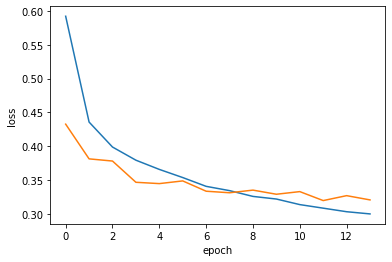

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch');plt.ylabel('loss')
plt.plot()